<div style="color:orange;
           font-size:150%;
           font-family:cursive;
           letter-spacing:0.5px;
           text-align:center;">
           In the name of God
</p>
</div>

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;">

<p style="padding: 10px;
              color:#0baef4;
              text-align:center;
              font-size:160%;">
              📚 Naive Bayes Project: Predict Customer Behaviour 📚
</p>
</div>

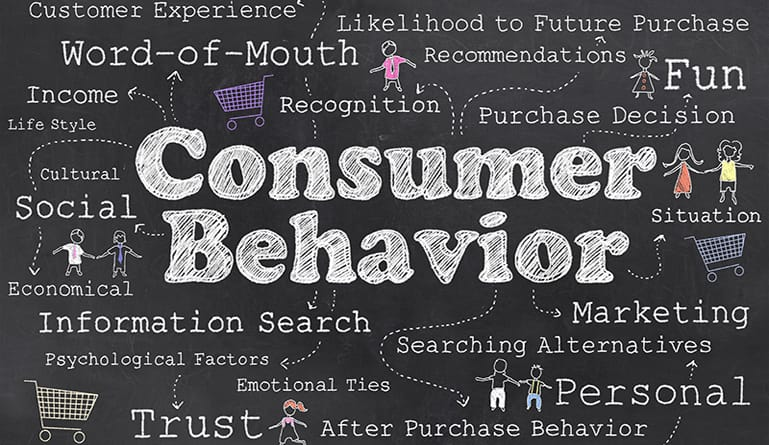

***

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head1">
    <p style="padding: 6px;
              color:orange;
              text-align:center;
              font-size:100%;">
              1. About Dataset
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head1"></a></p>
</h1>
</div>

#### Context

The file has been used in order to apply different machine learning algorithms and to compare different results, taking as an example the Udemy Machine Learning courses files.

#### Content

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - whether the customer decided to buy specific products or not.

> target = Purchased

> features = User ID, Gender, Age, EstimatedSalary

In [ ]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
# import dataset
data = pd.read_csv('../input/customer-behaviour/Customer_Behaviour.csv')
print(f"shape: {data.shape}")
data.head()

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head2">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              2. Overview of Dataset
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head2">¶</a></p>
</h1>
</div>

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
df.info()

According to the above information:
 - It seems that there are no missing values, which will be checked in more detail below.
 - We have 4 features including `User ID`, `Gender`, `Age` and `EstimatedSalary`.
 - Our target is `Purchased`
 - We have only one categorical data that is `Gender`

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head3">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              3. Preparing Dataset
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head3">¶</a></p>
</h1>
</div>

In [ ]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

check each columns for detect syntax error or invalid values

In [ ]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

In [ ]:
# more details
df.describe(include=[np.number]).T

In [ ]:
df.describe(include=[object]).T

According to above tables:
 - The age range is between 16 and 60 years.
 - Target includes 2 classes 1 and 0.
 - The number of male and female in the dataset is almost the same.
 - The range of features are very different from each other and there is a need for standardization.

We do not need the user ID column to build the predictive model, so we drop it

In [ ]:
# Drop User ID columns
df.drop('User ID', axis=1, inplace=True)
df

In [ ]:
# convert categoriacl feature to numerical:
# only Gender is categorical
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])
df

Now check dataset for the last time

In [ ]:
df.info()

In [ ]:
df.isna().sum()

Alright, let's continue

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head4">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4. Exploratory Data Analysis (EDA)
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head4">¶</a></p>
</h1>
</div>

In [ ]:
# check distribution of EstimatedSalary (based on Purchased)
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'EstimatedSalary'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'EstimatedSalary'], label='Purchased', shade=True)
plt.title('KDE of EstimatedSalary (based on Purchased)', fontdict=font, pad=15)
plt.xticks(np.arange(0,200001,10000), rotation=90)
plt.xlim([0,200001])
plt.legend()
plt.show()



In [ ]:
# check distribution of Purchased (based on Purchased)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True)
plt.title('KDE of Age (based on Purchased)', fontdict=font, pad=15)
plt.xticks(np.arange(0,70,5))
plt.xlim([10,70])
plt.legend()
plt.show()

In [ ]:
# check distribution of EstimatedSalary (based on Gender)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Gender'] == 0, 'EstimatedSalary'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'EstimatedSalary'], label='Female', shade=True)
plt.title('KDE of EstimatedSalary (based on Gender)', fontdict=font, pad=15)
plt.xticks(np.arange(0,150001,10000), rotation=90)
plt.xlim([0,150001])
plt.legend()
plt.show()

In [ ]:
# check distribution of Age (based on Gender)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Gender'] == 0, 'Age'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'Age'], label='Female', shade=True)
plt.title('KDE of Age (based on Gender)', fontdict=font, pad=15)
plt.xticks(np.arange(0,70,5))
plt.xlim([10,70])
plt.legend()
plt.show()

According to above kde plots:
 - Most people whose income is between 40000 and 90000 don't decide to purchase a product.
 - Most people whose income is between 40000 and 90000 don't decide to purchase a product.
 - Most people who decide to purchase a product are older than people who don't decide to purchase a product.
 - People over the age of 43 are often interested in purchase a product.
 - Based on Gender for each male or female, kde is almost same.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head41">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.1. Univariate Analysis
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head41">¶</a></p>
</h1>
</div>

In [ ]:
df.describe().T

In [ ]:
# count based on Purchased (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Purchased', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Purchased (pie chart)
slices = df.Purchased.value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

In [ ]:
# count based on Gender (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Gender', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Gender (pie chart)
slices = df.Gender.value_counts().values
activities = ['Female (1)', 'Male (0)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Gender', y=1.09, **font)
plt.show()

According to above barplots and tabel:
 - The number of male and female is almost the same
 - he number of people who decide to purchased a product is less than the number of people who do not decide to purchased a product.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head42">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.2. Bivariate Analysis
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head42">¶</a></p>
</h1>
</div>

In [ ]:
# count of purchased based on Gender
%matplotlib inline
ax = sns.countplot(data=df, x='Purchased', hue='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Purchased (based on Gender)', fontdict=font, pad=15)
plt.show()

In [ ]:
# heatmap
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.suptitle('Count of Purchased (based on Gender)', y=1.09, x=0.35, **font)
plt.show()

In [ ]:
# draw box plot of Estimated salary for male(0) or female(1) Gender
# draw box plot of Estimated salary for no purchased(0) or purchased(1)
for col in ['Gender', 'Purchased']:
    sns.boxplot(data=df, x=col, y='EstimatedSalary')
    plt.title(f'Box plot of EstimatedSalary for {col}', fontdict=font)
    plt.show()

According to above plots:
 - Among the people who decide to purchase a product, there are more female than male, but among the people who do not decide to purchase a product, there are more male.
 - The highest correlation is between Purchased and Age (0.62).
 - The average EstimatedSalary of people who decide to purchase a product is higher than people who do not decide to purchase a product.
 - Average EstimatedSalary of male and female do not differ much.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head43">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.3. Multivariate Analysis
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head43">¶</a></p>
</h1>
</div>


We use scatter plots to examine data that is numerical in nature.

In [ ]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='Age', y='EstimatedSalary', hue='Purchased',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(15,65,5))
plt.show()

For a better view, we draw a 3D scatter plot

In [ ]:
fig = px.scatter_3d(
        data_frame=df,
        x='Age',
        y='EstimatedSalary',
        z='Gender',
        color='Purchased',
        template='ggplot2',
        opacity=0.6,
        height=700,
        title=f'3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

pio.show(fig)

In [ ]:
# check mean of EstimatedSalary based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary')
results.style.background_gradient(cmap='summer_r')

In [ ]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('EstimatedSalary for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

In [ ]:
# check mean of Age based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='Age')
results.style.background_gradient(cmap='summer_r')

In [ ]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Age for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

According to above plots:
- People with young age and low EstimatedSalary often do not have a decision to purchase product.
- People with a EstimatedSalary of more than 100000, regardless of their Age, often decide to purchase product.
- People over the age of 45, regardless of their EstimatedSalary, are more likely to pruchase a product.

These plots also confirm the previous results


<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head5">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              5. Model
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head5">¶</a></p>
</h1>
</div>

In [ ]:
# Our dataset we use for modeling
df

As you can see, both discrete and continuous types of data can be seen in the dataset, so among the types of Naive Bayes, we use the Multinomial Naive Bayes.
Considering that the range of features are very different, as mentioned before, they should be standardized first.

In [ ]:
# standardize EstimatedSalary and Age with StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,60)).fit(df[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

In [ ]:
# define x (features) and y (target)
x = np.asanyarray(df2.drop('Purchased', axis=1))
y = df2.Purchased.values.reshape(-1,1)

In [ ]:
FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}), 
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}), 
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for class 1
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    i=1
    ax[0].set_title('ROC Curve of Class 1', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR1, TPR1):
        ax[0].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[0].set_xlabel('FPR')
        ax[0].set_ylabel('TPR')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
        
    # plot ROC curve for class zero
    i=1
    ax[1].set_title('ROC Curve of Class 0', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR0, TPR0):
        ax[1].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)
    
    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")
    


    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train

In [ ]:
# Now create first model
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])

Accuracy is 0.78 and that is not bad but we want to improve model, so let's countinue.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head6">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              5. Improve Model
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head6">¶</a></p>
</h1>
</div>

First test some test_size for improve model

In [ ]:
# test test_size= 0.3
clf2, acc_test2, acc_train2 = modeling(x, y, 0.3, ['No Purchased=0', 'Purchased=1'])

test_size = 0.3 did not improve the performance of the model.

In [ ]:
# test test_size= 0.15
clf3, acc_test3, acc_train3 = modeling(x, y, 0.15, ['No Purchased=0', 'Purchased=1'])

test_size = 0.15 did not improve the performance of the model.

In [ ]:
# test test_size= 0.1
clf3, acc_test3, acc_train3 = modeling(x, y, 0.1, ['No Purchased=0', 'Purchased=1'])

test_size = 0.1 did not improve the performance of the model.
So we delete 3 last results because they did not improve the performance of the model. 

In [ ]:
# delete 3 last results
del FPR1[1:]
del TPR1[1:]
del FPR0[1:]
del TPR0[1:]
del ACC_test[1:]
del ACC_train[1:]
del Recall[1:]
del Precision[1:]
del F1[1:]

Ok. So test_size=0.2 is better than other and edit this hyperparameter is not change much the performance of model.
Now we try to improve model by Cross Validation with `Perform_cross_val` function.

In [ ]:
Perform_cross_val(clf1, 10, x, y, scoring='accuracy')

Folds 6 and 10 are more different from the average than other folds. Therefore, maybe by removing them, the model will be better:

In [ ]:
# first find index of datapoint in fold 1 and 3 by following func:
find_fold_index(10, x)

Now we delete index `[200-239] , [360-399]`

In [ ]:
# delete above index from df2
df3 = df2.drop(df2.index[np.r_[200:239+1, 360:399+1]], axis=0)
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')

In [ ]:
# define new x and y 
x2 = np.asanyarray(df3.drop('Purchased', axis=1))
y2 = df3.Purchased.values.reshape(-1,1)

In [ ]:
clf2, acc_test2, acc_train2 = modeling(x2, y2, 0.2, classes=['No Purchased=0', 'Purchased=1'])

Now the performance of the model has improved and reached an accuracy of 0.81. As shown in the confusion matrix and the classification report, due to the lack of data in class 1, the accuracy of this class is low, and the 12 people who decided to purchase were wrongly predicted as class zero. However, the accuracy achieved is good.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head7">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              7. Visualization Final Model
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head7">¶</a></p>
</h1>
</div>

In [ ]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
x_test = np.concatenate((x_test, y_test), axis=1)
x_test = pd.DataFrame(x_test, columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])

fig = px.scatter_3d(
    data_frame= x_test,
    x=x_test.Age,
    y=x_test.EstimatedSalary,
    z=x_test.Purchased,
    color=clf2.predict(x_test.drop('Purchased', axis=1)).astype(str),
    color_discrete_sequence={0:'red', 1:'green'},
    template='ggplot2',
    opacity=0.6,
    height=700,
    title=f'Visualization Performance of clf2 in Predicting')

pio.show(fig)

In [ ]:
clf2.predict(x_test.drop('Purchased', axis=1))

In the figure drawn above, it is very clear that at the bottom of the cube where all the data are correctly predicted and all are red, but at the top of the cube where all the circles should be green, red circles are also seen, which indicates the wrong prediction. 

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head8">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              8. Predict Sample Data
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head8">¶</a></p>
</h1>
</div>

In [ ]:
# fit final model on all of data (train + test)
final_model = MultinomialNB()
final_model.fit(x2, y2)

# new sample data
new_sample = pd.DataFrame({'Gender': [1], 'Age': [18], 'EstimatedSalary': [70000]})
print(f"Gender: {new_sample['Gender'].values[0]}\n"
      f"Age: {new_sample['Age'].values[0]}\n"
      f"EstimatedSalary: {new_sample['EstimatedSalary'].values[0]}")

# Satandardize new_sample by use scaler
new_sample['EstimatedSalary'] = scaler.transform(new_sample[['EstimatedSalary']])
ns = np.asanyarray(new_sample)

# predict new sample data
result = final_model.predict(ns)
print('='*38)
print(f"class {result}")


<div style="color:black;
           display:fill;
           border-radius:5px;
           font-size:120%;
           font-family:cursive;
           letter-spacing:0.5px;
           color: crimson;
           text-align:center;">
           Thanks for your attention 😊🙏🏻
</div>

<div style="color:black;
           display:fill;
           border-radius:5px;
           font-size:200%;
           font-family:Verdana;
           text-align:center;">
           The End
</div>